In [2]:
# this notebook quickly visualizes the total particle count, concentration, and size measured from the Handix POPS 
import pandas as pd 
import xarray as xr 
import numpy as np 

In [3]:
#point to the data in the github repo
#data = pd.read_csv(r"C:\Users\lizzy\Downloads\HK_20230816x005.csv")
files = sorted(glob.glob('../../data/handix_POPs/HK_20230816x005.csv'))
data = pd.read_csv(files)

In [4]:
data

,DateTime,TimeSSM,Status,DataStatus,PartCt,HistSum,PartCon,BL,BLTH,STD,...,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15
0,1.692221e+09,76663.7985,3,2,4,4,26.96,2040,2069,9.63,...,0,0,0,0,0,0,0,0,0,0
1,1.692221e+09,76664.7977,3,0,329,329,98.41,2038,2069,10.49,...,36,23,4,0,0,0,0,0,0,0
2,1.692221e+09,76665.7986,3,0,302,302,94.80,2035,2065,9.80,...,34,16,2,0,0,0,0,0,0,0
3,1.692221e+09,76666.7984,3,0,297,297,99.17,2036,2067,10.34,...,30,4,3,1,0,0,0,0,0,0
4,1.692221e+09,76667.7972,3,0,312,312,104.85,2035,2064,9.94,...,47,14,7,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,1.692221e+09,77016.7971,3,0,286,286,94.36,2036,2063,8.83,...,35,15,0,0,0,0,0,0,0,0
354,1.692221e+09,77017.7974,3,0,262,262,85.97,2033,2062,9.64,...,25,14,1,0,0,0,1,0,0,0
355,1.692221e+09,77018.7971,3,0,284,284,94.56,2033,2060,8.92,...,18,16,3,0,0,0,0,0,0,0
356,1.692221e+09,77019.7976,3,0,274,274,93.21,2033,2062,9.65,...,28,16,1,4,1,0,0,1,0,0


The Handix POPs measures particles per second. The total count is expressed in particles per second, and the concentration is expressed as the number of particles in a cubic centimeter. 
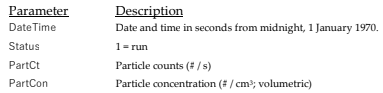 

[]

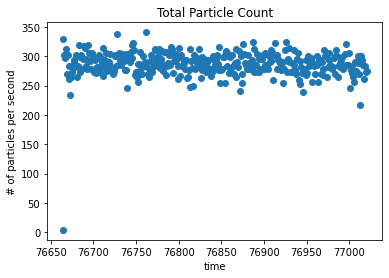

In [5]:
#total concentration over time  
import matplotlib.pyplot as plt 

x = data.TimeSSM
plt.title("Total Particle Count")
plt.ylabel("# of particles per second")
plt.xlabel("time")
plt.scatter(x, data.PartCt)
plt.plot()

[]

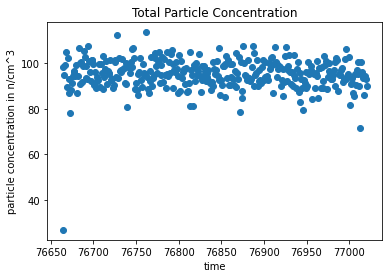

In [6]:
#total particle concentration
plt.title("Total Particle Concentration")
plt.ylabel("particle concentration in n/cm^3")
plt.xlabel("time")
plt.scatter(x, data.PartCon)
plt.plot()

From the manual: "The POPS bins particles based on the logarithm of their peak scattering amplitudes. The bin
boundaries are logarithmically spaced and determined based on the number of bins (nbins) and
logmin and logmax parameters set in the instrument configuration file." As it is configured now, the size bins are as stated in Appendix 2 table 4. 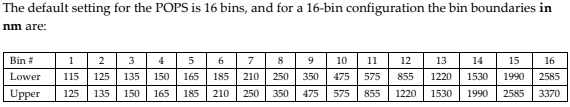

[]

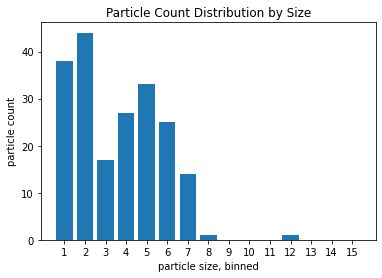

In [12]:
#distribution of particles by size, instrument bins out for us. 
#bar graph each column
#line 2 is the first complete measurement on this file. 
labels = np.arange(1,16,1)

plt.xticks(labels)                   
plt.title("Particle Count Distribution by Size")
plt.ylabel("particle count")
plt.xlabel("particle size, binned")
#change this data.iloc[***4***,35:50:1] number to check different timesteps. 
plt.bar(labels, data.iloc[354,35:50:1] )
plt.plot()